In [1]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pandas as pd
import numpy as np

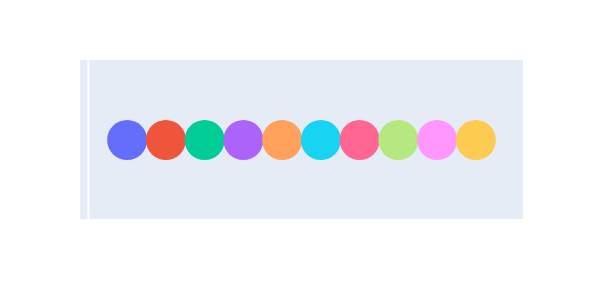

In [2]:
fig = px.scatter(
    x=range(1,11),
    y=np.ones(10),
    color=px.colors.DEFAULT_PLOTLY_COLORS,
    height=300,
    width=1400,
)
fig.update_traces(marker=dict(size=40))
fig.update_yaxes(title="", showticklabels=False, showgrid=False)
fig.update_xaxes(title="", showticklabels=False, showgrid=False)
fig.update_layout(showlegend=False)
fig.show()

In [3]:
px.data.gapminder()

country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0     Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1     Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2     Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3     Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4     Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   
...           ...       ...   ...      ...       ...         ...       ...   
1699     Zimbabwe    Africa  1987   62.351   9216418  706.157306       ZWE   
1700     Zimbabwe    Africa  1992   60.377  10704340  693.420786       ZWE   
1701     Zimbabwe    Africa  1997   46.809  11404948  792.449960       ZWE   
1702     Zimbabwe    Africa  2002   39.989  11926563  672.038623       ZWE   
1703     Zimbabwe    Africa  2007   43.487  12311143  469.709298       ZWE   

      iso_num  
0           4  
1           4  
2           4  
3           4  
4           4  
...       ...  
1699      716  
1700      716  
1701      716  
1702      716  
1703      716  

[1704 rows x 8 columns]

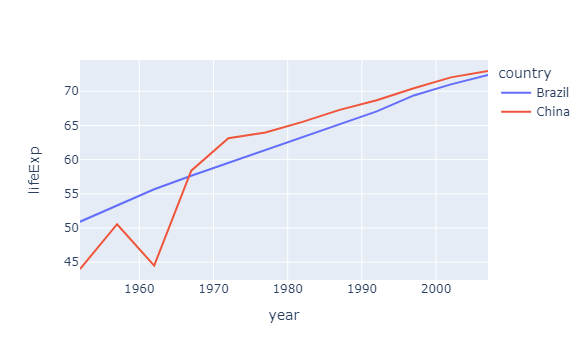

In [4]:
df = px.data.gapminder().query("country in ['Brazil', 'China']")
fig = px.line(
    df,
    x="year",
    y="lifeExp",
    # line_group gives us two lines instead of a single connected line
    line_group="country",
    color="country"
)
fig.show()

In [5]:
fig.update_layout(height=900, width=900, font_size=24).update_traces(line={'width': 10}).write_image("line_color.svg")

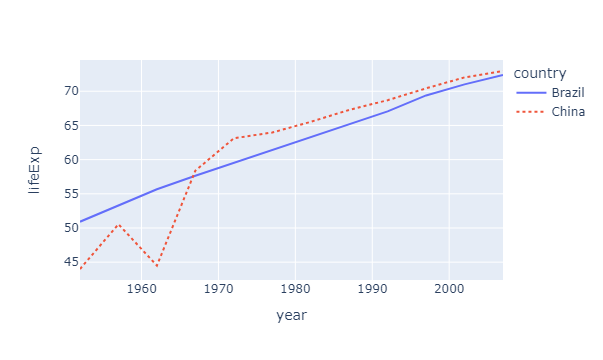

In [6]:
fig = px.line(
    df,
    x="year",
    y="lifeExp",
    line_group="country",
    color="country",
    line_dash="country" # makes the line dashed for one country
)
fig.show()

In [7]:
fig.update_layout(height=900, width=900, font_size=24).update_traces(line={'width': 10}).write_image("line_color-dash.svg")

In [8]:
# to pick two colors in plotlys Blues scale
px.colors.sequential.Blues_r

['rgb(8,48,107)',
 'rgb(8,81,156)',
 'rgb(33,113,181)',
 'rgb(66,146,198)',
 'rgb(107,174,214)',
 'rgb(158,202,225)',
 'rgb(198,219,239)',
 'rgb(222,235,247)',
 'rgb(247,251,255)']

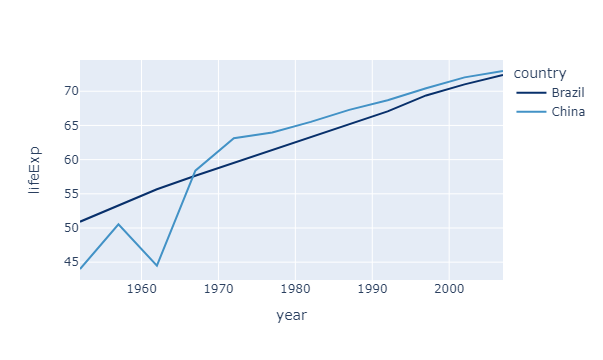

In [9]:
fig = px.line(
    df,
    x="year",
    y="lifeExp",
    color="country",
    line_group="country",
    color_discrete_sequence=["rgb(8,48,107)", "rgb(66,146,198)"],
)
fig.show()

In [10]:
fig.update_layout(height=900, width=900, font_size=24).update_traces(line={'width': 10}).write_image("line_color-dash-blue-colorscale.svg")

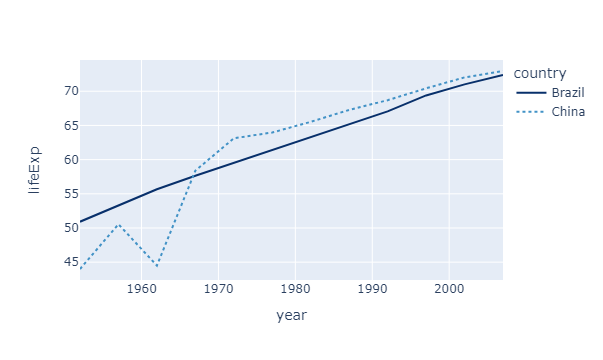

In [11]:
fig = px.line(
    df,
    x="year",
    y="lifeExp",
    color="country",
    line_group="country",
    line_dash="country",
    color_discrete_map={"Brazil": "rgb(8,48,107)", "China": "rgb(66,146,198)"},
)
fig.show()

In [12]:
fig.update_layout(height=900, width=900, font_size=24).update_traces(line={'width': 10}).write_image("line_color-dash-blue-colorscale.svg")

In [13]:
n=50
rng = np.random.default_rng()
ys = 5+rng.standard_normal(size=n)

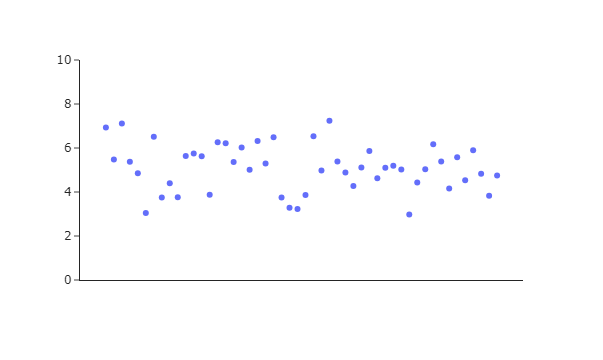

5.100591745438213


In [14]:
fig = px.scatter(
    x=np.arange(n)+1,
    y=ys,
).update_layout(template="simple_white").update_yaxes(range=[0,10], title="", showgrid=False).update_xaxes(title="", showticklabels=False, showgrid=False, zeroline=False, showline=True, ticks="", tickvals=[])
fig.show()
print(ys.mean())

In [15]:
fig.update_layout(height=900, width=1500, font_size=48).update_traces(marker={'size': 20}).write_image("guess-mean_5.03_simulated_mean_5_sd_1.svg")

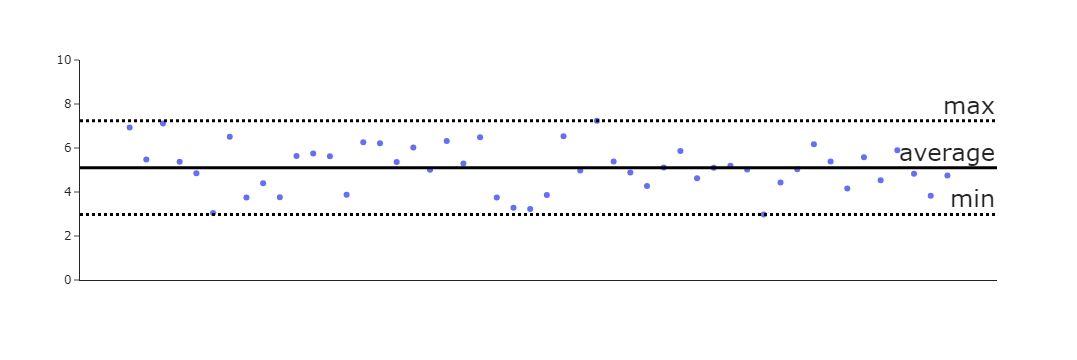

In [16]:
fig = px.scatter(
    x=np.arange(n)+1,
    y=ys,
).update_layout(template="simple_white").update_yaxes(range=[0,10], title="", showgrid=False).update_xaxes(title="", showticklabels=False, showgrid=False, zeroline=False, showline=True, ticks="", tickvals=[])
fig.add_hline(y=ys.mean(), annotation_text="average", opacity=1, line=dict(color="black", width=3), annotation_font_size=24) # need to set the opacity and line parameters due to a bug in the simple_white template
fig.add_hline(y=ys.max(), line_dash="dot", annotation_text="max", opacity=1, line=dict(color="black", width=3), annotation_font_size=24) 
fig.add_hline(y=ys.min(), line_dash="dot", annotation_text="min", opacity=1, line=dict(color="black", width=3), annotation_font_size=24) 

In [17]:
fig.update_layout(height=900, width=1500, font_size=48).update_traces(marker={'size': 20}).write_image("guess-mean_5.03_simulated_mean_5_sd_1_annotated.svg")

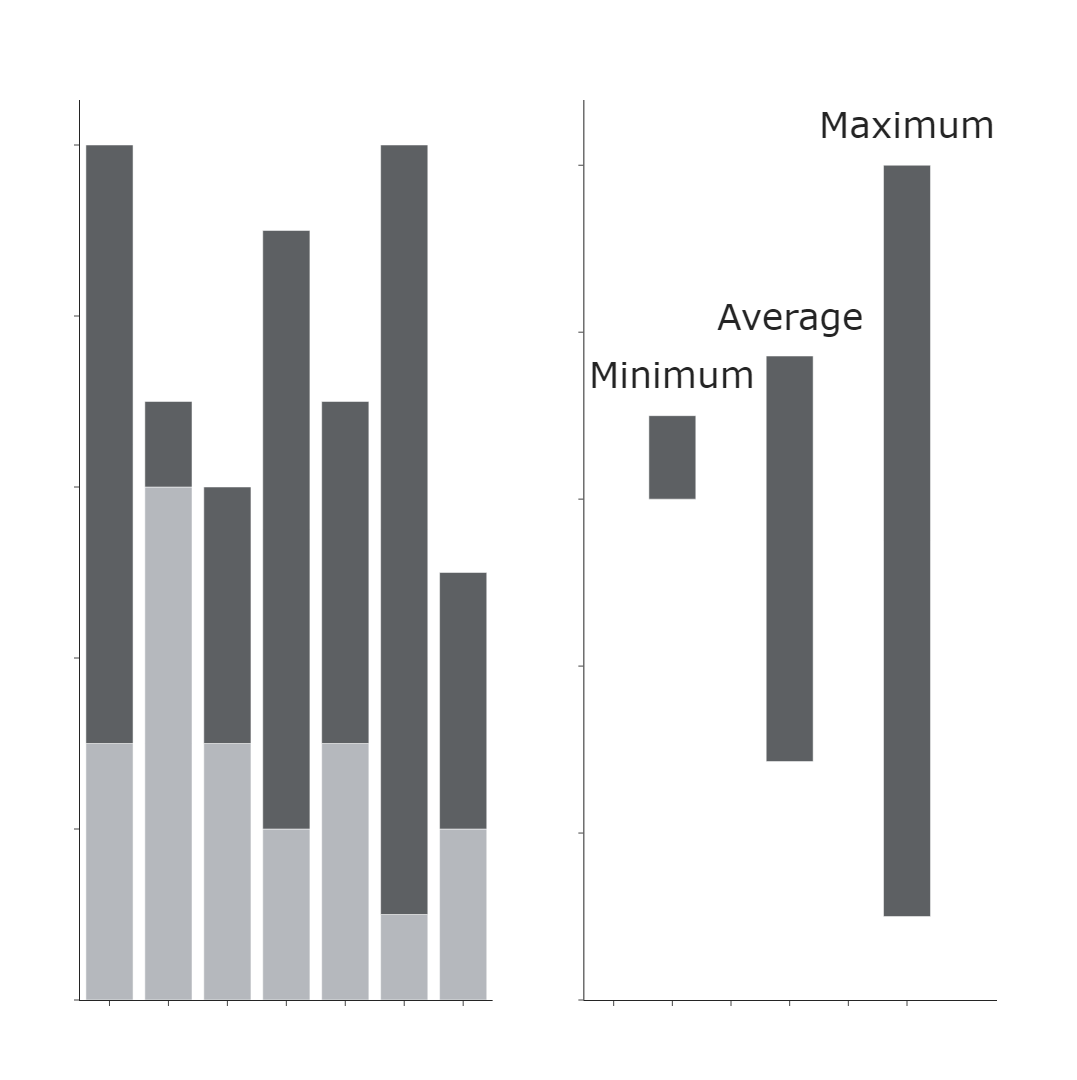

In [18]:
fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Bar(
    x=["a", "a", "b", "b", "c", "c", "d", "d", "e", "e", "f", "f", "g", "g"],
    y=[3,7, 6,1, 3,3, 2, 7, 3,4, 1,9, 2, 3],
    marker=dict(color=["#b5b8bd", "#5d6063"]*7),
), row=1, col=1)
dark = [7, 1, 3, 7,4, 9, 3]
dark_mean = pd.Series(dark).mean()
light = [3, 6, 3, 2, 3, 1, 2]
light_mean=pd.Series(light).mean()
fig.add_trace(go.Bar(
    x=["a", "a", "b", "b", "c", "c", "d", "d", "e", "e", "f", "f"],
    y=[0,0, 6,1, 0,0, light_mean, dark_mean, 0,0, 1,9],
    marker=dict(color=["#FFFFFF", "#5d6063"]*8),
), row=1, col=2)
fig.add_annotation(x="b", y=7.5, text="Minimum", row=1, col=2, font_size=36, showarrow=False)
fig.add_annotation(x="d", y=8.2, text="Average", row=1, col=2, font_size=36, showarrow=False)
fig.add_annotation(x="f", y=10.5, text="Maximum", row=1, col=2, font_size=36, showarrow=False)
fig.update_layout(height=1080, width=1800, template="simple_white", showlegend=False)
fig.update_xaxes(showticklabels=False)
fig.update_yaxes(showticklabels=False)
fig.write_image("bar-stat.svg")
fig.show()

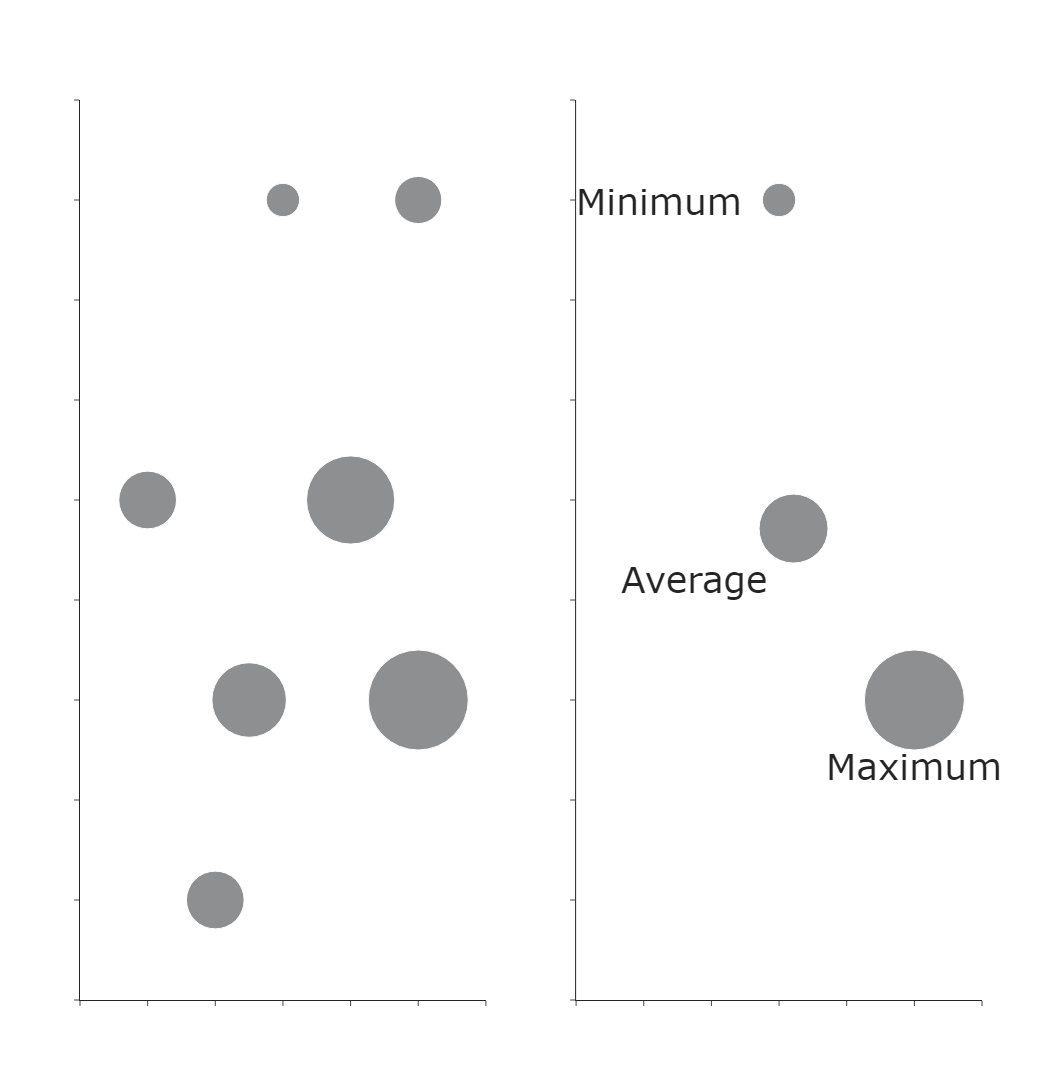

In [19]:
df = pd.DataFrame({"x": [1, 2, 2.5, 3, 5, 4, 5], "y": [5, 1, 3, 8, 3, 5, 8], "area": [3, 3, 5, 1, 9, 7, 2]})
fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(
    x=df["x"], 
    y=df["y"],
    mode="markers",
    marker=dict(
        size=df["area"],
        sizemode="area",
        sizeref=2.*max(df["area"])/(100.**2),
        color="#5d6063",
        sizemin=4
    )
), row=1, col=1)

min_size = df.loc[df["area"]==df["area"].min()]
max_size = df.loc[df["area"]==df["area"].max()]
mean_size = pd.DataFrame(df.mean()).T
stat = pd.concat([min_size, max_size, mean_size])
fig.add_trace(go.Scatter(
    x=stat["x"],
    y=stat["y"],
    mode="markers",
    marker=dict(
        size=stat["area"],
        sizemode="area",
        sizeref=2.*max(df["area"])/(100.**2),
        color="#5d6063",
        sizemin=4
    )
), row=1, col=2)
fig.add_annotation(x=min_size["x"].values[0], y=min_size["y"].values[0], text="Minimum", row=1, col=2, font_size=36, showarrow=False, xshift=-120)
fig.add_annotation(x=max_size["x"].values[0], y=max_size["y"].values[0], text="Maximum", row=1, col=2, font_size=36, showarrow=False, yshift=-65)
fig.add_annotation(x=mean_size["x"].values[0], y=mean_size["y"].values[0], text="Average", row=1, col=2, font_size=36, showarrow=False, xshift=-100, yshift=-50)
fig.update_layout(template="simple_white", height=1080, width=1800,showlegend=False)
fig.update_yaxes(title="", range=[0,9], showticklabels=False)
fig.update_xaxes(title="", range=[0,6], showticklabels=False)
fig.write_image("bubble-stat.svg")
fig.show()

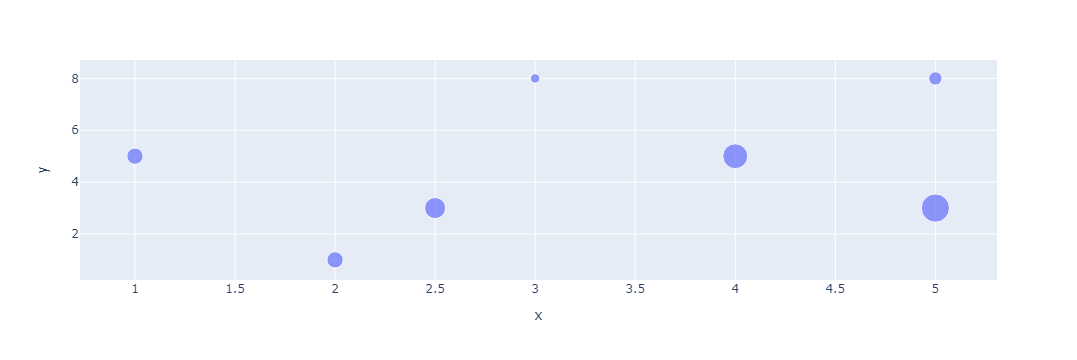

In [20]:
px.scatter(
    df,
    x="x",
    y="y",
    size="area"
)

In [21]:
px.data.carshare().describe()

centroid_lat  centroid_lon    car_hours   peak_hour
count    249.000000    249.000000   249.000000  249.000000
mean      45.523417    -73.591834  1092.528782    8.787149
std        0.035177      0.033098   572.187677    7.223874
min       45.448903    -73.738946    33.250000    0.000000
25%       45.497804    -73.618625   665.583333    3.000000
50%       45.527905    -73.587318  1020.916667    5.000000
75%       45.546145    -73.570955  1414.916667   15.000000
max       45.610879    -73.512460  3274.000000   23.000000

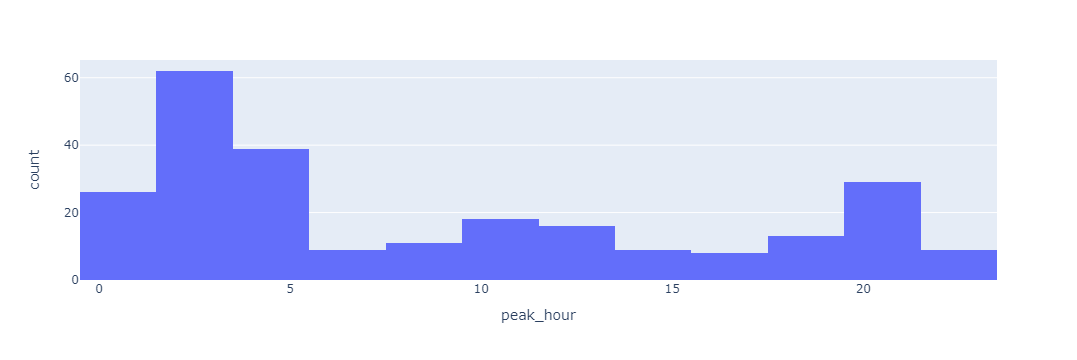

In [22]:
fig = px.histogram(
    px.data.carshare(),
    "peak_hour",
)
fig.show()
fig.update_xaxes(title="").update_layout(height=900, width=900, font_size=24).write_image("carshare-hist.svg")

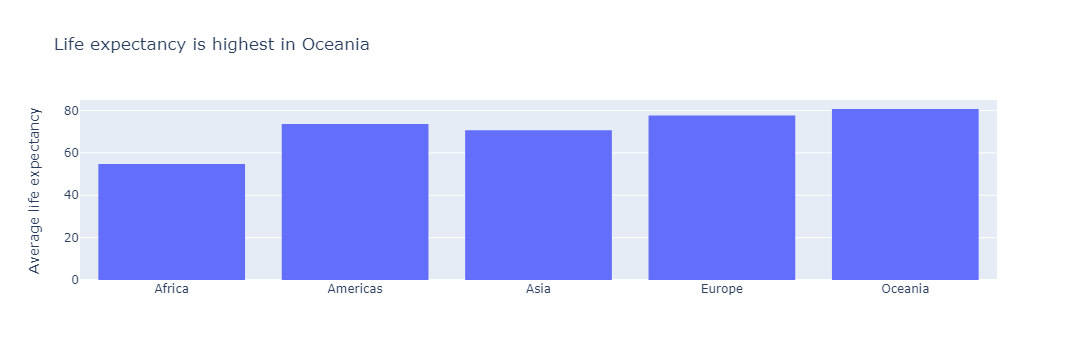

In [48]:
df = px.data.gapminder().query('year == 2007')
fig = px.histogram(
    df,
    y="lifeExp",
    x="continent",
    histfunc="avg",
    category_orders={
        "continent": sorted(df["continent"].unique())
    },
    title="Life expectancy is highest in Oceania"
).update_layout(yaxis_title="Average life expectancy", xaxis_title="")
fig.show()
fig.update_layout(height=900, width=900, font_size=24).write_image("life-exp-stat.svg")

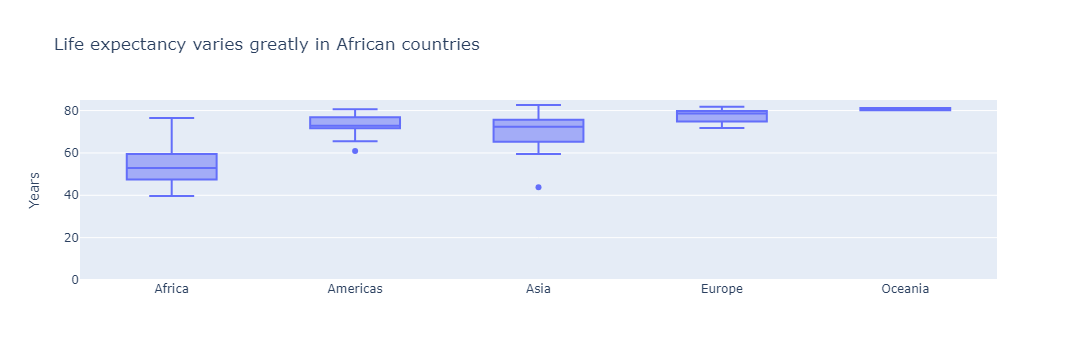

In [49]:
fig = px.box(
    df,
    y="lifeExp",
    x="continent",
    category_orders={
        "continent": sorted(df["continent"].unique())
    },
    title="Life expectancy varies greatly in African countries"
).update_layout(yaxis_title="Years", yaxis_range=[0, 85], xaxis_title="")
fig.show()
fig.update_layout(height=900, width=900, font_size=24).write_image("life-exp-box.svg")

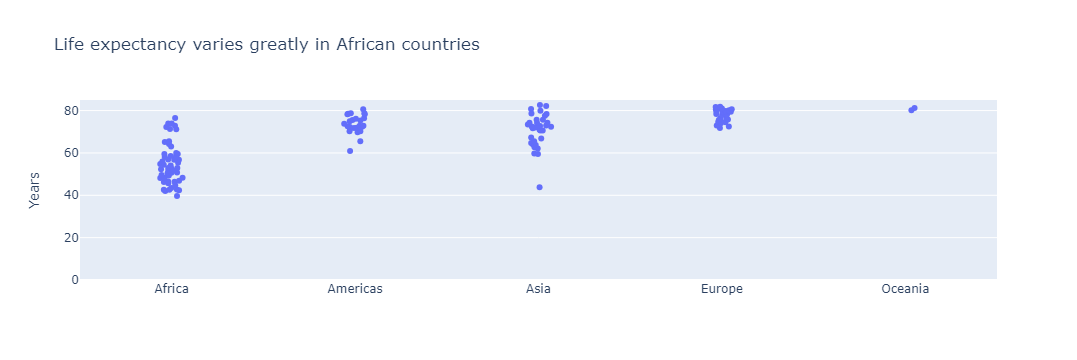

In [50]:
fig = px.strip(
    df,
    y="lifeExp",
    x="continent",
    category_orders={
        "continent": sorted(df["continent"].unique())
    },
    title="Life expectancy varies greatly in African countries"
).update_yaxes(title="Years", range=[0, 85]).update_xaxes(title="")
fig.show()
fig.update_layout(height=900, width=900, font_size=24).write_image("life-exp-strip.svg")

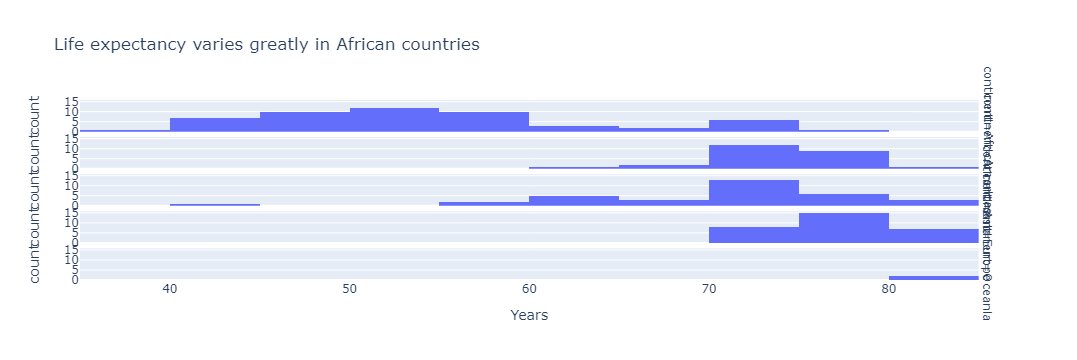

In [51]:
fig = px.histogram(
    df,
    x="lifeExp",
    facet_row="continent",
    category_orders={
        "continent": sorted(df["continent"].unique())
    },
    title="Life expectancy varies greatly in African countries"
)
fig.update_layout(xaxis_title="Years")
fig.show()

In [52]:
fig["layout"]["annotations"]

(layout.Annotation({
     'font': {},
     'showarrow': False,
     'text': 'continent=Oceania',
     'textangle': 90,
     'x': 0.98,
     'xanchor': 'left',
     'xref': 'paper',
     'y': 0.08800000000000001,
     'yanchor': 'middle',
     'yref': 'paper'
 }),
 layout.Annotation({
     'font': {},
     'showarrow': False,
     'text': 'continent=Europe',
     'textangle': 90,
     'x': 0.98,
     'xanchor': 'left',
     'xref': 'paper',
     'y': 0.29400000000000004,
     'yanchor': 'middle',
     'yref': 'paper'
 }),
 layout.Annotation({
     'font': {},
     'showarrow': False,
     'text': 'continent=Asia',
     'textangle': 90,
     'x': 0.98,
     'xanchor': 'left',
     'xref': 'paper',
     'y': 0.5,
     'yanchor': 'middle',
     'yref': 'paper'
 }),
 layout.Annotation({
     'font': {},
     'showarrow': False,
     'text': 'continent=Americas',
     'textangle': 90,
     'x': 0.98,
     'xanchor': 'left',
     'xref': 'paper',
     'y': 0.706,
     'yanchor': 'middle',
   

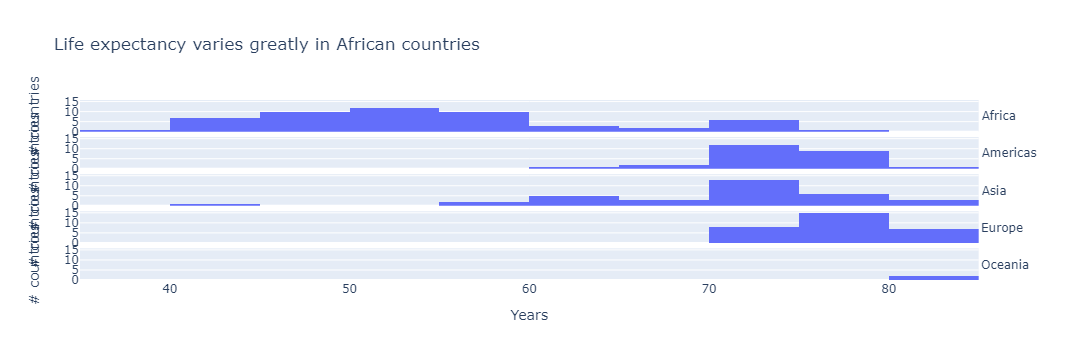

In [55]:
fig = px.histogram(
    df,
    x="lifeExp",
    facet_row="continent",
    category_orders={
        "continent": sorted(df["continent"].unique())
    },
    title="Life expectancy varies greatly in African countries"
).for_each_annotation(lambda a: a.update(text=a.text.split('=')[-1], textangle=0))
fig.update_layout(xaxis_title="Years").for_each_yaxis(lambda a:a.update(title="# countries"))
fig.show()
fig.update_layout(height=900, width=700, font_size=18).write_image("life-exp-hist.svg")

In [29]:
df = px.data.gapminder()
# 10 most populous countries in Asia in 1962
countries = df.loc[(df["continent"] == "Asia")&(df["year"]==1962)].sort_values(by="pop", ascending=False)["country"].iloc[0:10]
countries
df = df.loc[(df["country"].isin(countries)) & (df["year"].isin([1957, 1962]))]
df["year"] = df["year"].astype(str) # to make px.bar with barmode="group" work

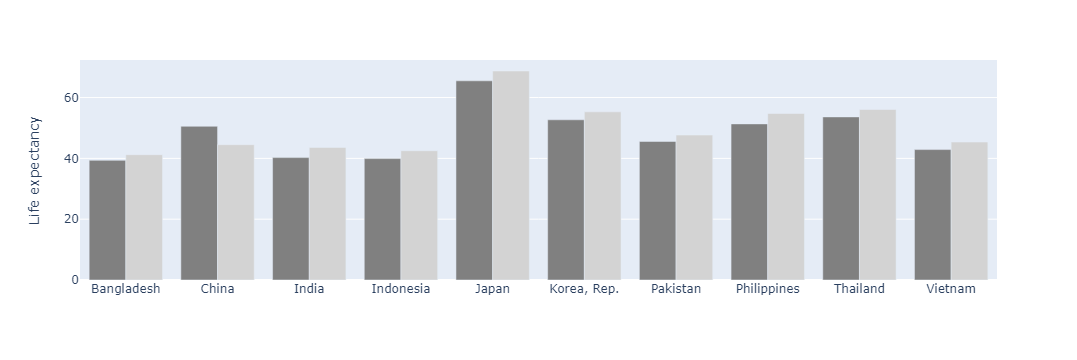

In [30]:
fig = px.bar(
    df,
    y="lifeExp",
    x="country",
    barmode="group",
    color="year",
    color_discrete_sequence=["grey", "lightgrey"],
).update_layout(
    showlegend=False,
    xaxis_title="",
    yaxis_title="Life expectancy"
)
fig.show()
fig.update_layout(height=900, width=1500, font_size=24).write_image("group-bars.svg")

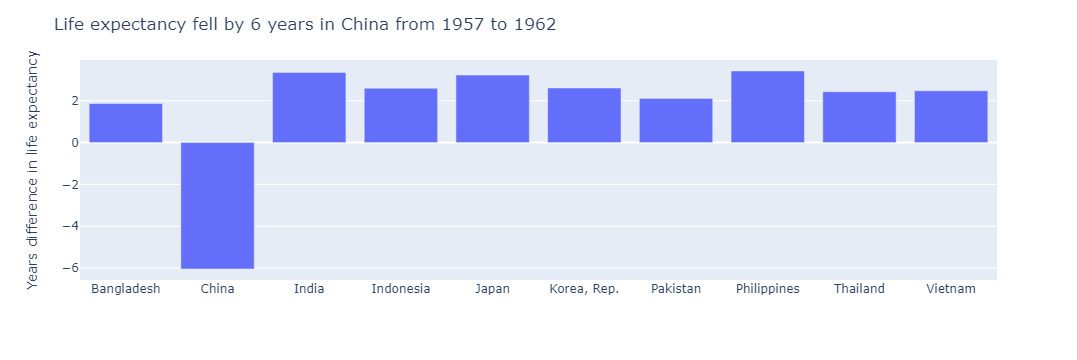

In [31]:
diff_lifeexp = df[df['year'] == "1962"].set_index('country')['lifeExp'] - df[df['year'] == "1957"].set_index('country')['lifeExp']
fig = px.bar(
    x=diff_lifeexp.index,
    y=diff_lifeexp
).update_layout(
    xaxis_title="",
    yaxis_title="Years difference in life expectancy",
    title="Life expectancy fell by 6 years in China from 1957 to 1962"
)
fig.show()
fig.update_layout(height=900, width=1500, font_size=24).write_image("group-diff-bars.svg")

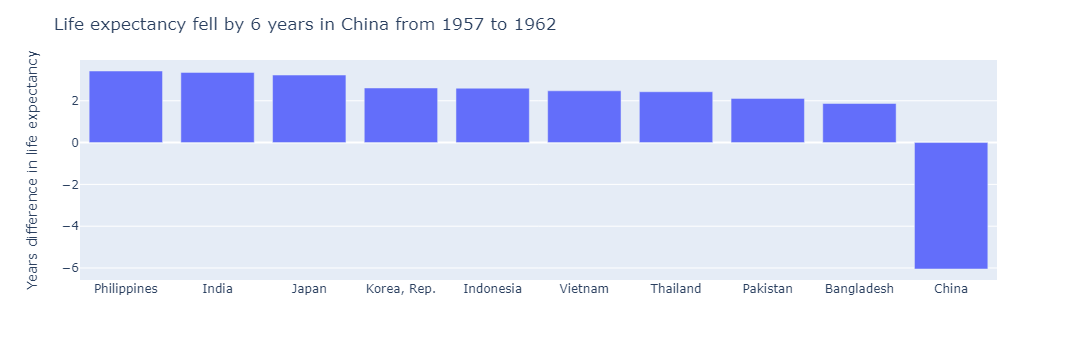

In [32]:
sorted_diff = diff_lifeexp.sort_values(ascending=False)
fig = px.bar(
    x=sorted_diff.index,
    y=sorted_diff
).update_layout(
    xaxis_title="",
    yaxis_title="Years difference in life expectancy",
    title="Life expectancy fell by 6 years in China from 1957 to 1962"
)
fig.show()
fig.update_layout(height=900, width=1500, font_size=24).write_image("group-diff-bars-sorted.svg")

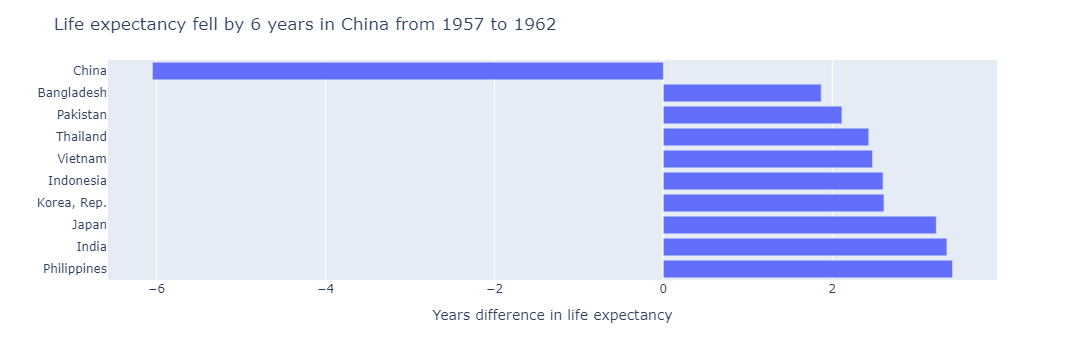

In [33]:
fig = px.bar(
    y=sorted_diff.index,
    x=sorted_diff,
).update_layout(
    yaxis_title="",
    xaxis_title="Years difference in life expectancy",
    title="Life expectancy fell by 6 years in China from 1957 to 1962"
)
fig.show()
fig.update_layout(height=900, width=1500, font_size=24).write_image("group-diff-bars-sorted-flipped.svg")

In [34]:
df["color"]="grey"
df.loc[df["country"] == "China", "color"] = "black"
df

country continent  year   lifeExp        pop    gdpPercap iso_alpha  \
97     Bangladesh      Asia  1957  39.34800   51365468   661.637458       BGD   
98     Bangladesh      Asia  1962  41.21600   56839289   686.341554       BGD   
289         China      Asia  1957  50.54896  637408000   575.987001       CHN   
290         China      Asia  1962  44.50136  665770000   487.674018       CHN   
697         India      Asia  1957  40.24900  409000000   590.061996       IND   
698         India      Asia  1962  43.60500  454000000   658.347151       IND   
709     Indonesia      Asia  1957  39.91800   90124000   858.900271       IDN   
710     Indonesia      Asia  1962  42.51800   99028000   849.289770       IDN   
793         Japan      Asia  1957  65.50000   91563009  4317.694365       JPN   
794         Japan      Asia  1962  68.73000   95831757  6576.649461       JPN   
841   Korea, Rep.      Asia  1957  52.68100   22611552  1487.593537       KOR   
842   Korea, Rep.      Asia  1962  55.29200   26420307  1536.344387       KOR   
1165     Pakistan      Asia  1957  45.55700   46679944   747.083529       PAK   
1166     Pakistan      Asia  1962  47.67000   53100671   803.342742       PAK   
1213  Philippines      Asia  1957  51.33400   26072194  1547.944844       PHL   
1214  Philippines      Asia  1962  54.75700   30325264  1649.552153       PHL   
1525     Thailand      Asia  1957  53.63000   25041917   793.577415       THA   
1526     Thailand      Asia  1962  56.06100   29263397  1002.199172       THA   
1645      Vietnam      Asia  1957  42.88700   28998543   676.285448       VNM   
1646      Vietnam      Asia  1962  45.36300   33796140   772.049160       VNM   

      iso_num  color  
97         50   grey  
98         50   grey  
289       156  black  
290       156  black  
697       356   grey  
698       356   grey  
709       360   grey  
710       360   grey  
793       392   grey  
794       392   grey  
841       410   grey  
842       410   grey  
1165      586   grey  
1166      586   grey  
1213      608   grey  
1214      608   grey  
1525      764   grey  
1526      764   grey  
1645      704   grey  
1646      704   grey

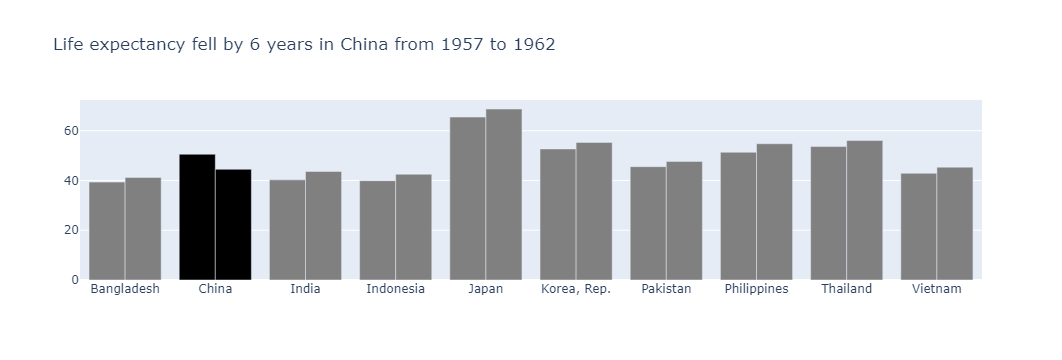

In [35]:
import plotly.graph_objects as go
df_1957 = df[df["year"] == "1957"]
df_1962 = df[df["year"] == "1962"]
fig = go.Figure(
    data=[
        go.Bar(
            x=df_1957["country"],
            y=df_1957["lifeExp"],
            marker={"color": df_1957["color"]},
        ),
        go.Bar(
            x=df_1962["country"],
            y=df_1962["lifeExp"],
            marker={"color": df_1962["color"]},
        ),
    ]
)
fig.update_layout(showlegend=False, title="Life expectancy fell by 6 years in China from 1957 to 1962")
fig.show()
fig.update_layout(height=900, width=1500, font_size=24).write_image("group-bars-color.svg")

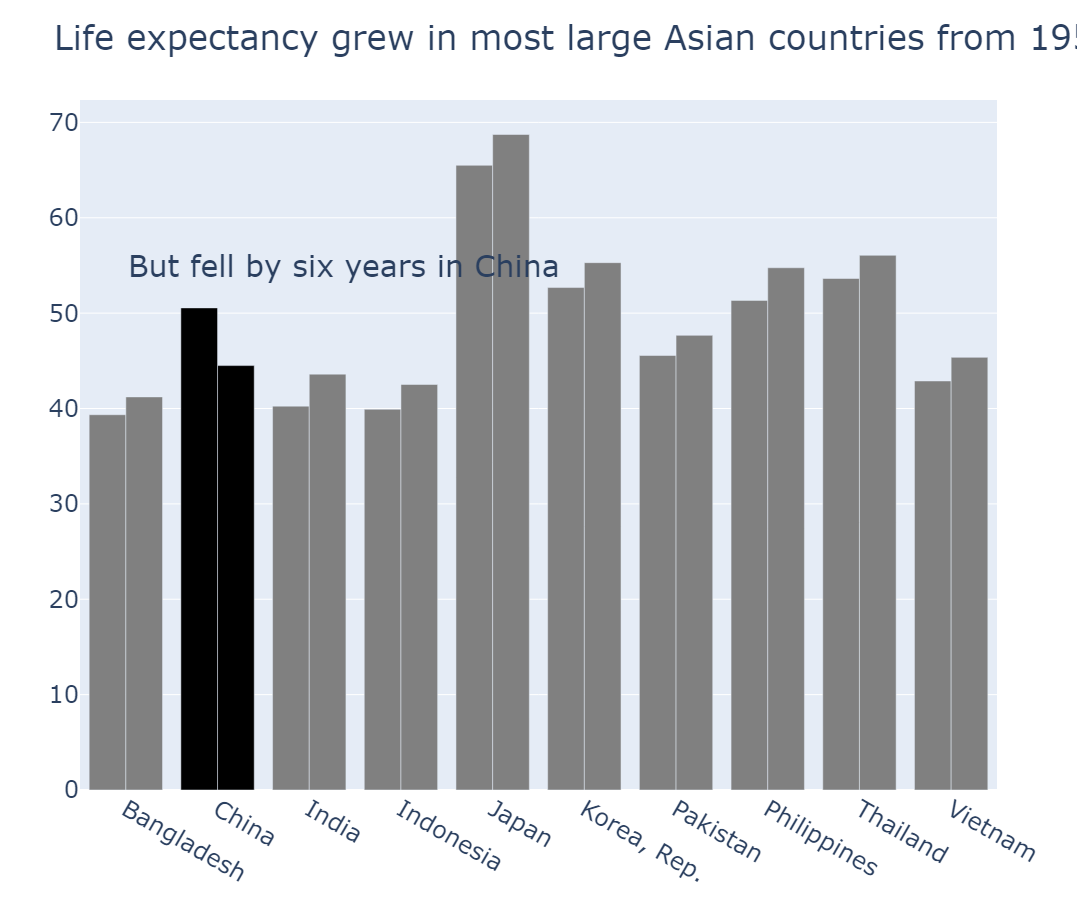

In [36]:
fig.update_layout(title="Life expectancy grew in most large Asian countries from 1957 to 1962")
fig.add_annotation(
    x=0.05,
    xref="paper",
    y=55,
    text="But fell by six years in China",
    font_size=30,
    showarrow=False
)
fig.show()
fig.write_image("group-bar-color-annotation.svg")

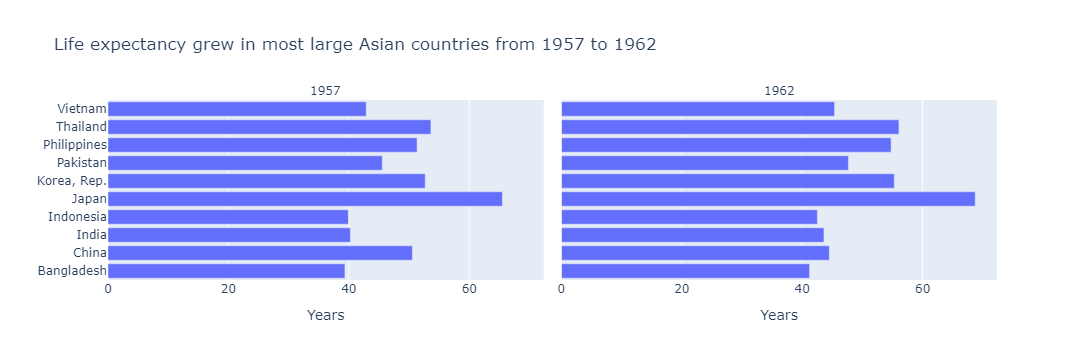

In [37]:
fig = px.bar(
    df,
    x="lifeExp",
    y="country",
    facet_col="year",
    title="Life expectancy grew in most large Asian countries from 1957 to 1962"
).for_each_annotation(
    lambda a: a.update(text=a.text.split("=")[-1])
).update_yaxes(
    title=""
).for_each_xaxis(
    lambda a:a.update(title="Years")
)
fig.show()
fig.update_layout(height=900, width=1500, font_size=24).write_image("group-bars-year.svg")

In [38]:
df

country continent  year   lifeExp        pop    gdpPercap iso_alpha  \
97     Bangladesh      Asia  1957  39.34800   51365468   661.637458       BGD   
98     Bangladesh      Asia  1962  41.21600   56839289   686.341554       BGD   
289         China      Asia  1957  50.54896  637408000   575.987001       CHN   
290         China      Asia  1962  44.50136  665770000   487.674018       CHN   
697         India      Asia  1957  40.24900  409000000   590.061996       IND   
698         India      Asia  1962  43.60500  454000000   658.347151       IND   
709     Indonesia      Asia  1957  39.91800   90124000   858.900271       IDN   
710     Indonesia      Asia  1962  42.51800   99028000   849.289770       IDN   
793         Japan      Asia  1957  65.50000   91563009  4317.694365       JPN   
794         Japan      Asia  1962  68.73000   95831757  6576.649461       JPN   
841   Korea, Rep.      Asia  1957  52.68100   22611552  1487.593537       KOR   
842   Korea, Rep.      Asia  1962  55.29200   26420307  1536.344387       KOR   
1165     Pakistan      Asia  1957  45.55700   46679944   747.083529       PAK   
1166     Pakistan      Asia  1962  47.67000   53100671   803.342742       PAK   
1213  Philippines      Asia  1957  51.33400   26072194  1547.944844       PHL   
1214  Philippines      Asia  1962  54.75700   30325264  1649.552153       PHL   
1525     Thailand      Asia  1957  53.63000   25041917   793.577415       THA   
1526     Thailand      Asia  1962  56.06100   29263397  1002.199172       THA   
1645      Vietnam      Asia  1957  42.88700   28998543   676.285448       VNM   
1646      Vietnam      Asia  1962  45.36300   33796140   772.049160       VNM   

      iso_num  color  
97         50   grey  
98         50   grey  
289       156  black  
290       156  black  
697       356   grey  
698       356   grey  
709       360   grey  
710       360   grey  
793       392   grey  
794       392   grey  
841       410   grey  
842       410   grey  
1165      586   grey  
1166      586   grey  
1213      608   grey  
1214      608   grey  
1525      764   grey  
1526      764   grey  
1645      704   grey  
1646      704   grey

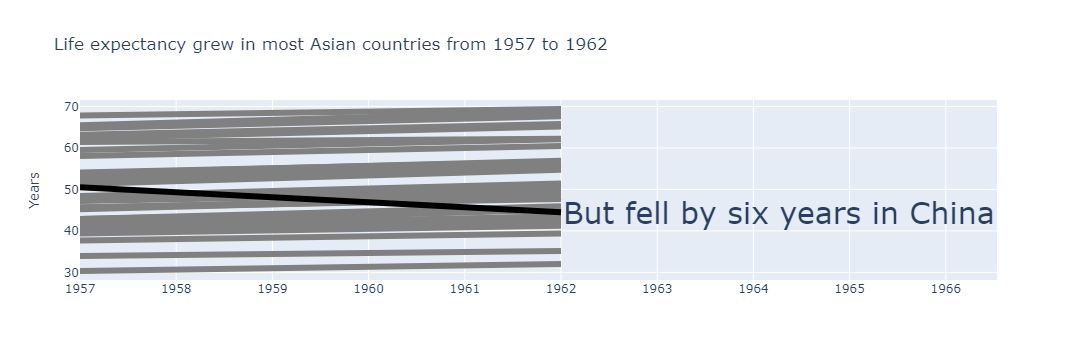

In [39]:
df = px.data.gapminder()
df = df[(df["year"].isin([1957, 1962])) & (df["continent"] == "Asia")]
df["color"] = "grey"
df.loc[df["country"]=="China", "color"] = "black"
fig = px.line(
    df,
    x="year",
    y="lifeExp",
    color="color",
    color_discrete_map={"grey": "grey", "black": "black"},
    line_group="country",
    title="Life expectancy grew in most Asian countries from 1957 to 1962"
).update_layout(
    showlegend=False,
    yaxis_title="Years",
    xaxis_title="",
).update_traces(line_width=6)
fig.add_annotation(
    x=1962,
    xanchor="left",
    y=44.5,
    text="But fell by six years in China",
    font_size=30,
    showarrow=False
)
fig.show()
fig.update_layout(autosize=False, xaxis_tickvals=[1957, 1962], xaxis_range=[1956.5, 1966], width=1300, height=900, font_size=24)
fig.write_image("line-groups.svg")

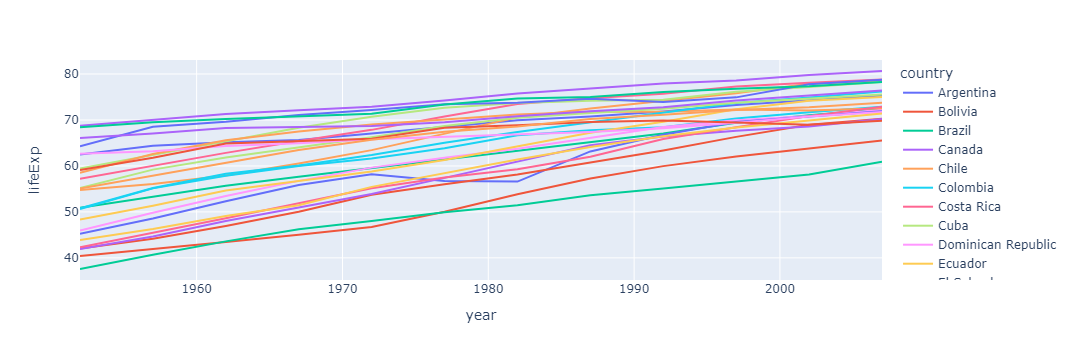

In [40]:
df = px.data.gapminder().query("continent=='Americas'")
fig = px.line(
    df,
    x="year",
    y="lifeExp",
    color="country",
    line_group="country",
)
fig.show()
fig.update_layout(
    font_size=24,
    height=900,
    width=900,
    yaxis_title="Life expectancy",
    xaxis_title=""
).write_image("line-all-colors-chaos.svg")

In [41]:
(df.loc[df.year==2007].set_index("country")["lifeExp"]-df.loc[df.year==1957].set_index("country")["lifeExp"]).sort_values()

country
Trinidad and Tobago     8.019
Paraguay                8.556
United States           8.752
Uruguay                 9.340
Jamaica                 9.957
Puerto Rico            10.206
Canada                 10.693
Argentina              10.921
Venezuela              15.840
Cuba                   15.948
Panama                 16.336
Colombia               17.771
Costa Rica             18.756
Brazil                 19.105
Haiti                  20.220
Mexico                 21.005
Dominican Republic     22.407
Chile                  22.479
El Salvador            23.308
Ecuador                23.638
Bolivia                23.664
Peru                   25.158
Honduras               25.533
Guatemala              26.117
Nicaragua              27.467
Name: lifeExp, dtype: float64

In [42]:
df["color"] = "grey"
df.loc[df["country"] == "Nicaragua", "color"] = "purple"

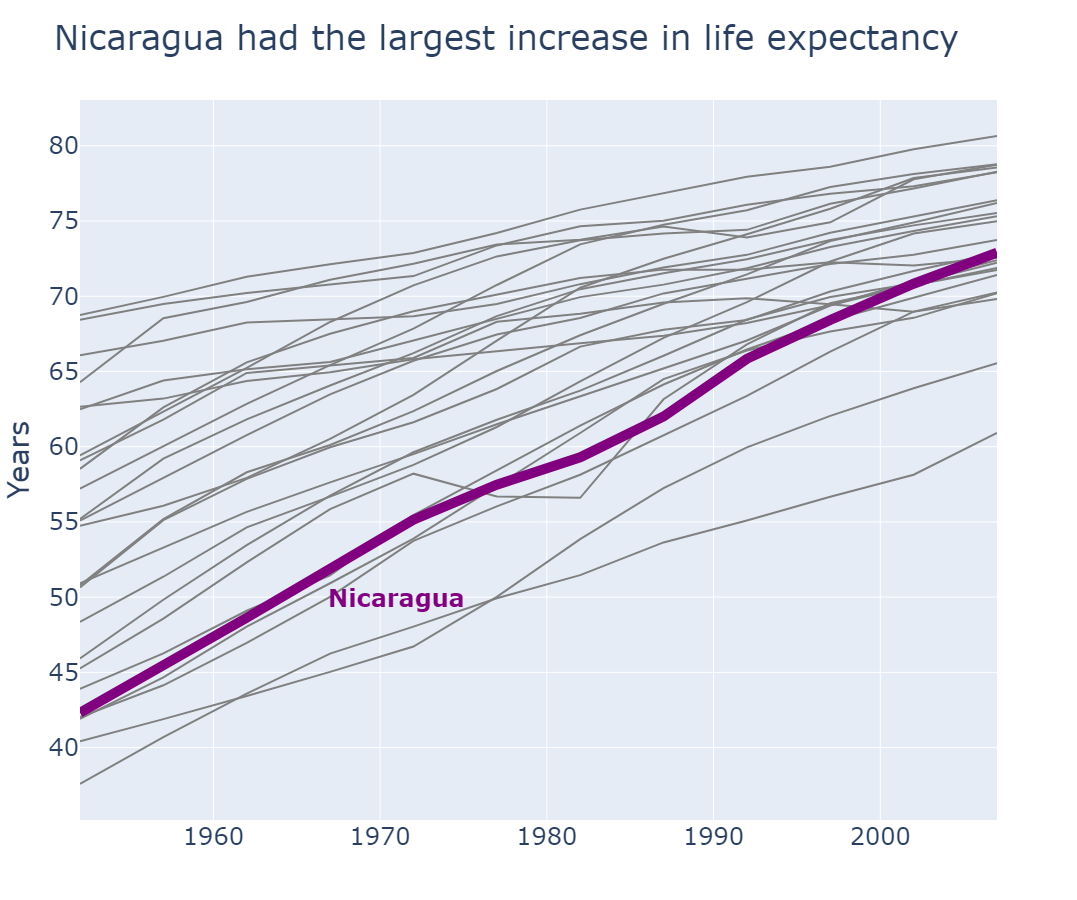

In [43]:

# Plot the traces separately
fig = px.line(
    df[df["country"] != "Nicaragua"],
    x="year",
    y="lifeExp",
    color="color",
    line_group="country",
    color_discrete_sequence=["grey"],
    title="Nicaragua had the largest increase in life expectancy"
)
fig.add_trace(
    go.Scatter(
        x=df[df["country"] == "Nicaragua"]["year"],
        y=df[df["country"] == "Nicaragua"]["lifeExp"],
        mode="lines",
        line={"width":10, "color":"purple"},
    )
)
fig.add_annotation(
    x=1971,
    y=50,
    text="<b>Nicaragua</b>", # html tags to make the text bold
    font_size=24,
    font_color="purple",
    showarrow=False,
)
fig.update_layout(
    font_size=24,
    height=900,
    width=1000,
    yaxis_title="Years",
    xaxis_title="",
    showlegend=False,
)
fig.show()
fig.write_image("line-nicaragua.svg")

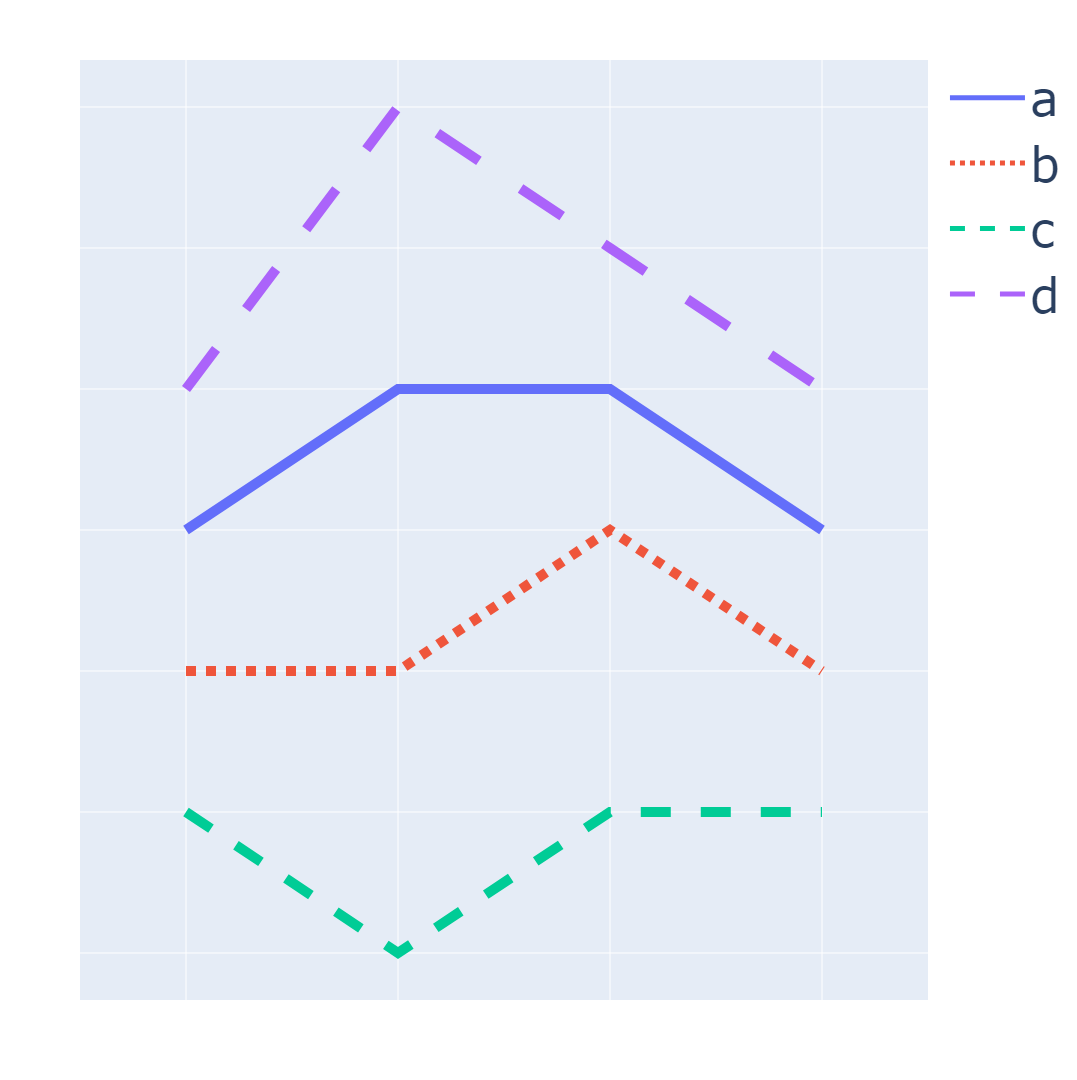

In [45]:
df = pd.DataFrame({ "a": [4, 5, 5, 4], "b": [3, 3, 4, 3], "c": [2, 1, 2, 2], "d": [5, 7, 6, 5]})
df["x"] = [1, 2, 3, 4]
df = df.melt(id_vars="x")
fig = px.line(
    df,
    x="x",
    y="value",
    line_group="variable",
    line_dash="variable",
    color="variable",
    height=1080,
    width=1200,
    labels={"variable": "", "value": "y"},
)
fig.update_xaxes(range=[0.5, 4.5], nticks=5, title="", showticklabels=False)
fig.update_yaxes(title="", showticklabels=False)
fig.update_traces(line=dict(width=10))
fig.update_layout(
    legend=dict(font=dict(size=48),itemsizing="constant", itemwidth=75) # to make legend wide enough to see dash pattern
)
fig.show()
fig.write_image("legend.svg")

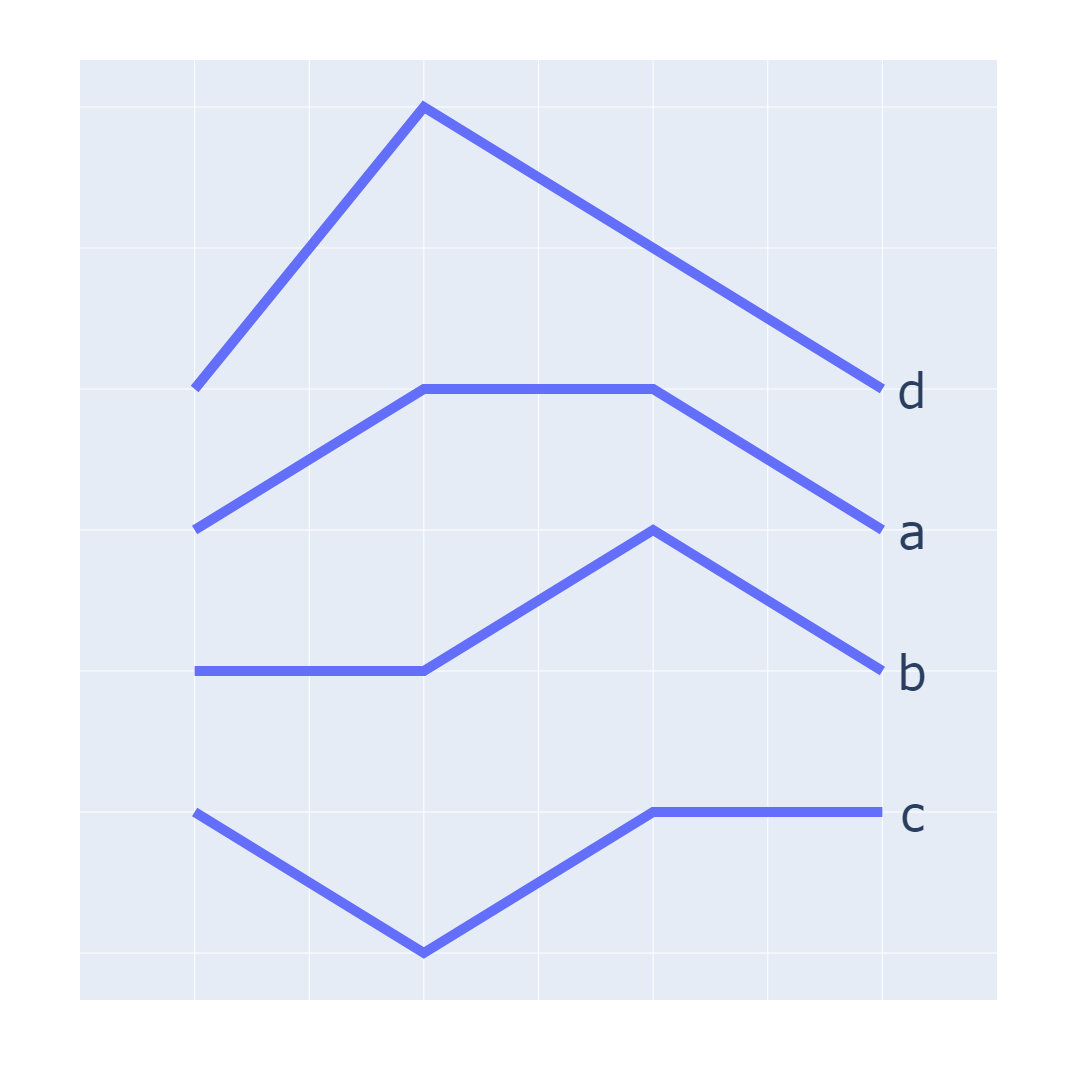

In [46]:
fig =  px.line(
    df,
    x="x",
    y="value",
    line_group="variable",
    height=1080,
    width=1080,
    labels={"variable": "", "value": "y"},
)
for variable in df["variable"].unique():
    fig.add_annotation(
        x=4,
        y=df.loc[(df["variable"] == variable) & (df["x"] == 4), "value"].iloc[0],
        text=variable,
        showarrow=False,
        xshift=30,
        font=dict(size=48)
    )
fig.update_xaxes(range=[0.5, 4.5], title="", showticklabels=False)
fig.update_yaxes(title="", showticklabels=False)
fig.update_layout(showlegend=False, )
fig.update_traces(line_width=10)
fig.show()
fig.write_image("direct-labels.svg")